In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
#renomeando colunas

nomes_colunas = {'unfinished' : "Nao_Finalizado",
                'expected_hours' : 'Horas_esperadas',
                'price': "Valor"}
dados.rename(columns = nomes_colunas, inplace = True)
dados.head()

,Nao_Finalizado,Horas_esperadas,Valor
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0: 1,
    1: 0
}

dados['Finalizado'] = dados.Nao_Finalizado.map(troca)
dados.head()

,Nao_Finalizado,Horas_esperadas,Valor,Finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Horas_esperadas', ylabel='Valor'>

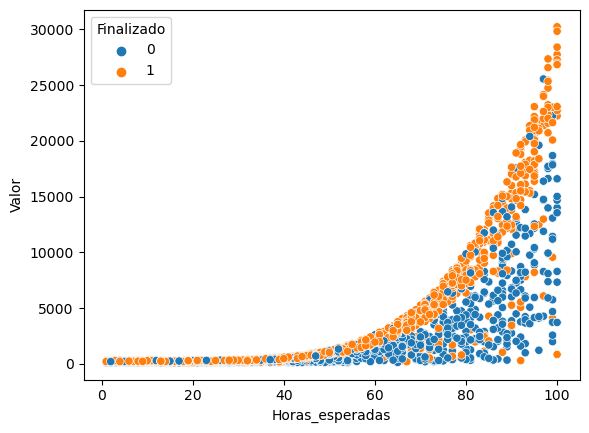

In [6]:
sns.scatterplot(x = 'Horas_esperadas', y = 'Valor', hue = 'Finalizado', data = dados)

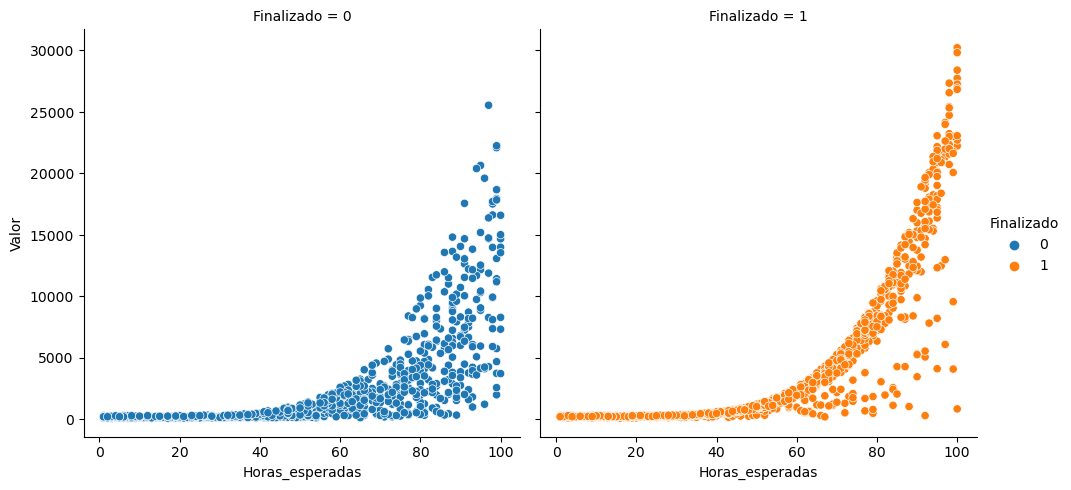

In [7]:
sns.relplot(x = 'Horas_esperadas', y = 'Valor', col = 'Finalizado', hue = 'Finalizado', data = dados)

In [8]:
# modelagem 

x = dados[['Horas_esperadas', 'Valor']]
y = dados['Finalizado']

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y,teste_y = train_test_split(x, y, test_size = 0.25, random_state=SEED, stratify = y)

qtd_treino = treino_x.shape[0]
qtd_teste = teste_x.shape[0]
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = (accuracy_score(teste_y, previsoes)) * 100

print("Treinamos com %d elementos, e testaremos com %d" %(qtd_treino, qtd_teste))
print("A acuracia foi de %.2f%%" %acuracia)

Treinamos com 1617 elementos, e testaremos com 540
A acuracia foi de 64.63%


C:\Users\cat13\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [210]:
# Comparando com linhas de base 

import numpy as np

previsoes_de_base = np.ones(qtd_teste)
acuracia = (accuracy_score(teste_y, previsoes_de_base)) * 100
print("A acuracia do algoritmo de baseline de %.2f%%" %acuracia)


A acuracia do algoritmo de baseline de 52.59%


In [211]:
#verificando aprendizagem do algoritmo

x_min = teste_x['Horas_esperadas'].min()
x_max = teste_x['Horas_esperadas'].max()
y_min = teste_x['Valor'].min()
y_max = teste_x['Valor'].max()


In [212]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)

C:\Users\cat13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


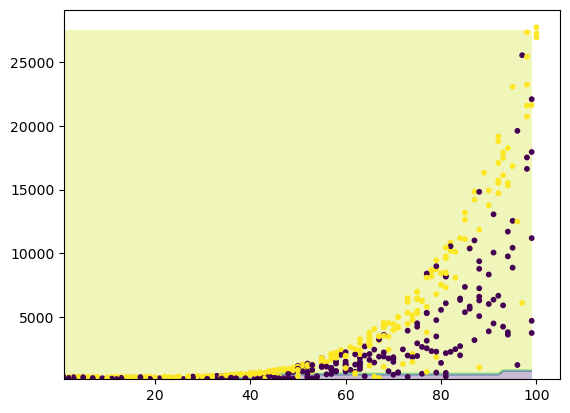

In [214]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.Horas_esperadas, teste_x.Valor, c = teste_y, s=10)

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 3
np.random.seed(SEED)
treino_x, teste_x, treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

qtd_treino = treino_x.shape[0]
qtd_teste = teste_x.shape[0]
model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = (accuracy_score(teste_y, previsoes)) * 100

print("Treinamos com %d elementos, e testaremos com %d" %(qtd_treino, qtd_teste))
print("A acuracia foi de %.2f%%" %acuracia)

Treinamos com 1617 elementos, e testaremos com 540
A acuracia foi de 55.37%


C:\Users\cat13\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


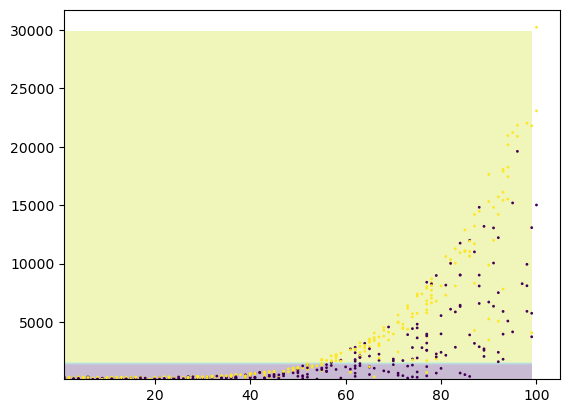

In [226]:
x_min = teste_x['Horas_esperadas'].min()
x_max = teste_x['Horas_esperadas'].max()
y_min = teste_x['Valor'].min()
y_max = teste_x['Valor'].max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.Horas_esperadas, teste_x.Valor, c = teste_y, s=1)

In [229]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 3
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y,teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

qtd_treino = treino_x.shape[0]
qtd_teste = teste_x.shape[0]
model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
acuracia = (accuracy_score(teste_y, previsoes)) * 100

print("Treinamos com %d elementos, e testaremos com %d" %(qtd_treino, qtd_teste))
print("A acuracia foi de %.2f%%" %acuracia)



Treinamos com 1617 elementos, e testaremos com 540
A acuracia foi de 68.33%


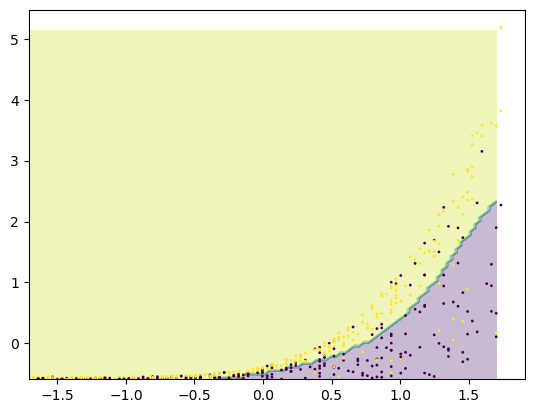

In [231]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s=1)